## 1.Импорт данных и библиотек

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, auc, accuracy_score, roc_auc_score,f1_score,log_loss,\
classification_report, roc_curve

import warnings
warnings.filterwarnings("ignore");

RAND = 10

In [35]:
## dataset
data = pd.read_csv('datasets/credit.csv')

## Описания полей

- client_id - идентификатор клиента
- education - уровень образования
- sex - пол заемщика
- age - возраст заемщика
- car - флаг наличия автомобиля
- сar_type - флаг автомобиля иномарки
- decline_app_cnt - количество отказанных прошлых заявок
- good_work - флаг наличия “хорошей” работы
- bki_request_cnt - количество запросов в БКИ
- home_address - категоризатор домашнего адреса
- work_address - категоризатор рабочего адреса
- income - доход заемщика
- foreign_passport - наличие загранпаспорта
- sna - связь заемщика с клиентами банка
- first_time - давность наличия информации о заемщике
- score_bki - скоринговый балл по данным из БКИ
- region_rating - рейтинг региона
- app_date - дата подачи заявки
- default - флаг дефолта по кредиту

In [36]:
## show data
data.head(10)

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0
5,41415,18FEB2014,SCH,M,27,Y,N,0,1,-2.032257,0,50,1,1,15000,2,3,N,0
6,28436,04FEB2014,SCH,M,39,N,N,0,0,-2.225004,0,60,1,2,28000,1,1,N,0
7,68769,17MAR2014,SCH,F,39,N,N,0,0,-1.522739,1,50,2,3,45000,3,3,N,0
8,38424,14FEB2014,SCH,F,50,Y,N,1,0,-1.676061,0,50,1,1,30000,1,4,N,0
9,4496,10JAN2014,UGR,F,54,N,N,0,0,-2.695176,1,50,2,3,24000,1,3,N,0


In [37]:
#size
data.shape

(73799, 19)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

In [39]:
#check null value
data.isnull().sum()

client_id             0
app_date              0
education           307
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
default               0
dtype: int64

#### Здесь мы видим что колонке 'education' имеется пропуски ,и для начало я хочу увидеть процентное сотношения пропусков

In [40]:
data.education.isna().sum() / data.shape[0]*100

0.41599479667746175

#### Проверяем уникальные значение

In [41]:
data.education.unique()

array(['SCH', 'GRD', 'UGR', 'PGR', 'ACD', nan], dtype=object)

#### Примерно расшифровал значение
- SCH - school, школьное образование

- GRD - graduate, выпускник

- UGR - undergraduates, старшекурсники

- PGR - аспирант

- ACD - академик?

#### Зополняю пропуски в колонке 'education' модой

In [42]:
ed_mode = data.education.mode()[0]
data.education = data.education.fillna(ed_mode)

In [43]:
data.isnull().sum()

client_id           0
app_date            0
education           0
sex                 0
age                 0
car                 0
car_type            0
decline_app_cnt     0
good_work           0
score_bki           0
bki_request_cnt     0
region_rating       0
home_address        0
work_address        0
income              0
sna                 0
first_time          0
foreign_passport    0
default             0
dtype: int64

#### Проверяю на основные статистические параметеры

In [44]:
data.describe()

,client_id,age,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,default
count,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000
mean,55137.965094,39.280641,0.275749,0.164894,-1.904724,2.000339,56.725701,1.575509,2.496280,41099.775417,1.733330,2.765458,0.126994
std,31841.921168,11.520378,0.804272,0.371087,0.498231,2.252073,13.055717,0.527631,0.689818,46166.322400,1.123622,1.009463,0.332968
min,1.000000,21.000000,0.000000,0.000000,-3.624586,0.000000,20.000000,1.000000,1.000000,1000.000000,1.000000,1.000000,0.000000
25%,27440.500000,30.000000,0.000000,0.000000,-2.259534,0.000000,50.000000,1.000000,2.000000,20000.000000,1.000000,2.000000,0.000000
50%,55274.000000,37.000000,0.000000,0.000000,-1.920823,1.000000,50.000000,2.000000,3.000000,30000.000000,1.000000,3.000000,0.000000
75%,82758.500000,48.000000,0.000000,0.000000,-1.569831,3.000000,60.000000,2.000000,3.000000,48000.000000,2.000000,4.000000,0.000000
max,110147.000000,72.000000,33.000000,1.000000,0.199773,53.000000,80.000000,3.000000,3.000000,1000000.000000,4.000000,4.000000,1.000000


#### Проверяю на уникальные значение 

In [45]:
data.nunique()

client_id           73799
app_date              120
education               5
sex                     2
age                    52
car                     2
car_type                2
decline_app_cnt        21
good_work               2
score_bki           69096
bki_request_cnt        38
region_rating           7
home_address            3
work_address            3
income                966
sna                     4
first_time              4
foreign_passport        2
default                 2
dtype: int64

In [46]:
data.home_address.unique()

array([1, 2, 3], dtype=int64)

In [47]:
##change type 
data[['home_address', 'work_address']] = data[['home_address', 'work_address']].astype(object)


In [48]:
data.describe(include=object)

,app_date,education,sex,car,car_type,home_address,work_address,foreign_passport
count,73799,73799,73799,73799,73799,73799,73799,73799
unique,120,5,2,2,2,3,3,2
top,18MAR2014,SCH,F,N,N,2,3,N
freq,1018,39167,41562,49832,59791,39956,44959,62733


## 2.Исследовательский анализ данных
#### Гипотезы:
- Возраст "хороших" заемщиков больше, по сравнению с "плохими" (распределения возраста в зависимости от флага дефолта смещено в большую сторону при default=0)
- Уровень образования зависит от возраста, что влияет и на возврат кредита, также люди с высшим образованием чаще являются "хорошими" заемщиками
- При good_work = 0 увеличивается риск невозврата кредита (флаг дефолта)
- Доход "хороших" заемщиков больше, по сравнению с "плохими" (распределения дохода в зависимости от флага дефолта смещено в большую сторону при default=0)
- score_bki напрямую взаимосвязан с default, чем он меньше, тем выше вероятность клиента выплатить кредит банку

## 2.1 Target

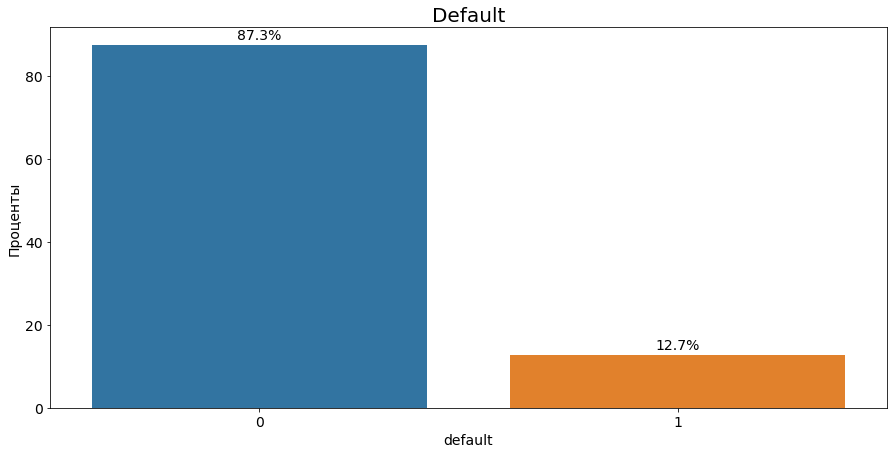

In [49]:
# нормирование на размер датасета
norm_target = (data
               .default
               .value_counts(normalize=True)
               .mul(100)
               .rename('percent')
               .reset_index())

plt.figure(figsize=(15, 7))
ax = sns.barplot(x='index', y='percent', data=norm_target)

# Вывод значений над графиками - annotate()
# В цикле смотрим каждый столбец графика и на нем отмечаем значения
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage,  # текст
                (p.get_x() + p.get_width() / 2., p.get_height()),  # координата xy
                ha='center', # центрирование
                va='center',
                xytext=(0, 10),
                textcoords='offset points', # точка смещения относительно координаты
                fontsize=14)

plt.title('Default', fontsize=20)

plt.xlabel('default', fontsize=14)
plt.ylabel('Проценты', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

In [50]:
norm_target

,index,percent
0,0,87.300641
1,1,12.699359


##### В датесете присутствует дисбаланс классов, при обучении модели это стоит учитывать

## 2.2 Age

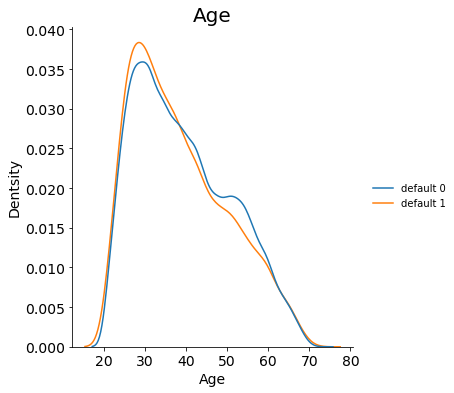

In [51]:
sns.displot(
    {
        "default 0": data[data.default == 0].age,
        "default 1": data[data.default == 1].age
    },
    kind="kde",
    common_norm=False # независимая нормализация каждого подмножества
)

plt.title('Age', fontsize=20)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

In [52]:
data.groupby('default')['age'].median()

default
0    38
1    36
Name: age, dtype: int64

In [53]:
data.groupby('default')['age'].mean()

default
0    39.390504
1    38.525395
Name: age, dtype: float64

In [54]:
data.groupby('default')['age'].apply(lambda x: x.value_counts().index[0]).reset_index()

,default,age
0,0,31
1,1,26


#### Есть небольшие различия по возрасту в разрезе default, гипотеза подтвердилась

## 2.3 Education

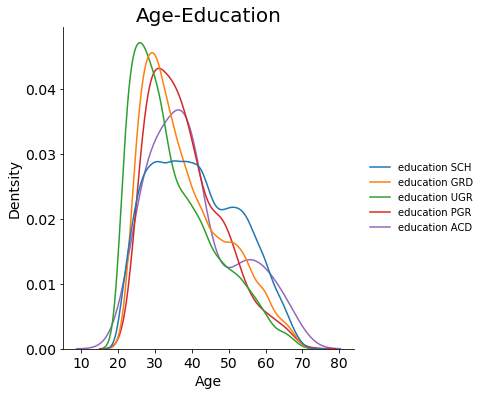

In [55]:
sns.displot(
    {
        "education SCH": data[data.education == 'SCH'].age,
        "education GRD": data[data.education == 'GRD'].age,
        "education UGR": data[data.education == 'UGR'].age,
        "education PGR": data[data.education == 'PGR'].age,
        "education ACD": data[data.education == 'ACD'].age,
    },
    kind="kde",
    common_norm=False
)

plt.title('Age-Education', fontsize=20)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

Если берем образование SCH , то возраст смещен в большую сторону, по сравнению с тем же UGR. Для ACD (академик) характерно смещено распределения возраста влево, если сравниваем с PGR (аспирант), что и понятно в принципе. Самые молодые - UGR, есть преположение, что в большей степени они будут являться "плохими" заемщиками.

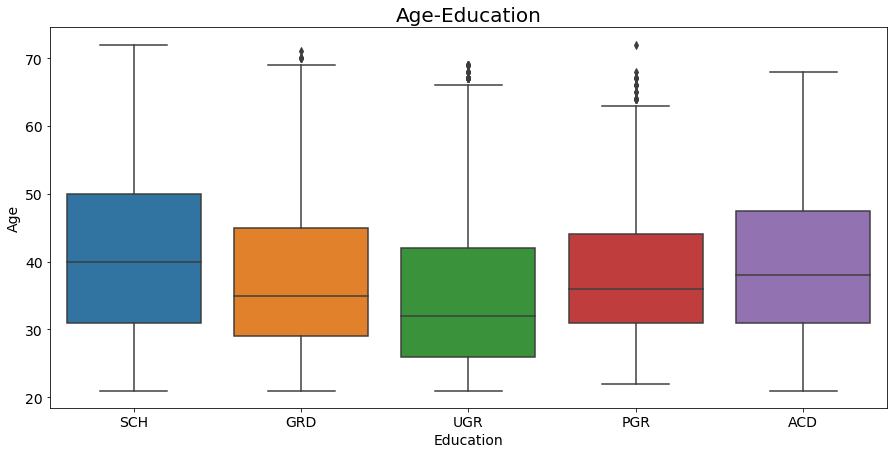

In [28]:
plt.figure(figsize=(15, 7))

sns.boxplot(x='education', y='age', data=data)

plt.title('Age-Education', fontsize=20)
plt.ylabel('Age', fontsize=14)
plt.xlabel('Education', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

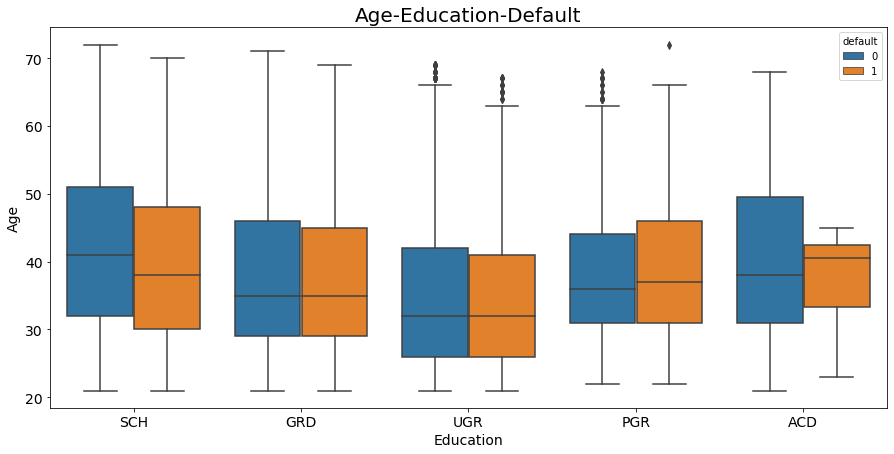

In [56]:
plt.figure(figsize=(15, 7))

sns.boxplot(x='education', y='age', hue='default', data=data)

plt.title('Age-Education-Default', fontsize=20)
plt.ylabel('Age', fontsize=14)
plt.xlabel('Education', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

Интересно то, что если мы берем уровень образования PGR и ACD, то среднее значение возраста у "плохих" заемщиков выше, чем у "хороших", но сам разброс значений и у тех и у тех также высокий. Возможно, если мы берем какой то предел возраст, например, от 30 до 50 лет, то внутри этой группы данный показатель не сильно будет влиять на полную выплату кредита.

In [58]:
data.groupby('education')['age'].median()

education
ACD    38
GRD    35
PGR    36
SCH    40
UGR    32
Name: age, dtype: int64

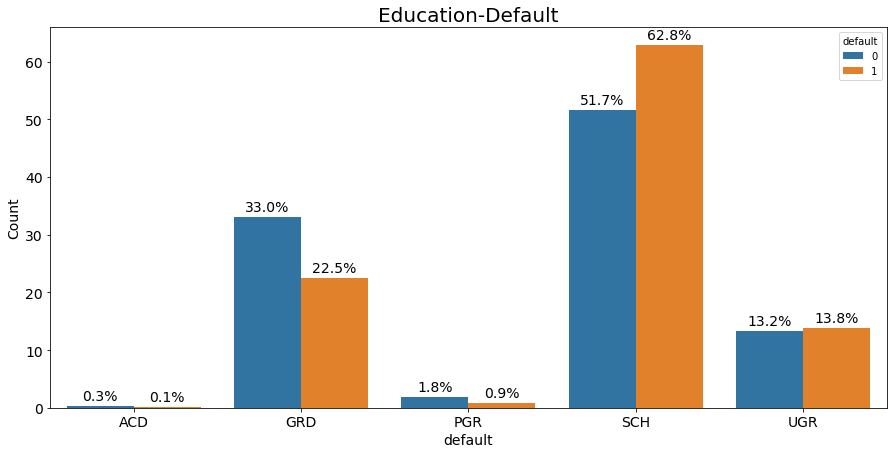

In [60]:
plt.figure(figsize=(15, 7))

educ_def = (data.groupby(['default'])['education']
            .value_counts(normalize=True)
            .rename('percentage')
            .mul(100)
            .reset_index()
            .sort_values('education'))

ax = sns.barplot(x="education", y="percentage", hue="default", data=educ_def)

for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage,  # текст
                (p.get_x() + p.get_width() / 2., p.get_height()),  # координата xy
                ha='center',  # центрирование
                va='center',
                xytext=(0, 10),
                textcoords='offset points',  # точка смещения относительно координаты
                fontsize=14)

plt.title('Education-Default', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('default', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

 Аналогично видим, что процент недобросовестных замщиков выше с уровнем образования SCH, для UGR разница не значительная. Скорее в данном случае влияет не как сам возраст, а уровень образования. Также можно отменить, что в какой то стемени GRD - более стабильны в плане выплат.

# Correlation

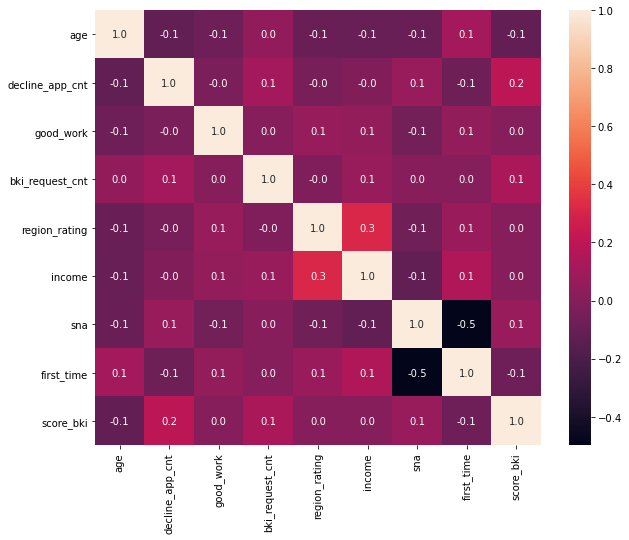

In [62]:
num_cols = ['age', 'decline_app_cnt', 'good_work', 'bki_request_cnt',
       'region_rating', 'income', 'sna', 'first_time', 'score_bki']

plt.figure(figsize=(10, 8))

sns.heatmap(data[num_cols].corr(method='spearman'), annot=True, fmt=".1f");

# Income

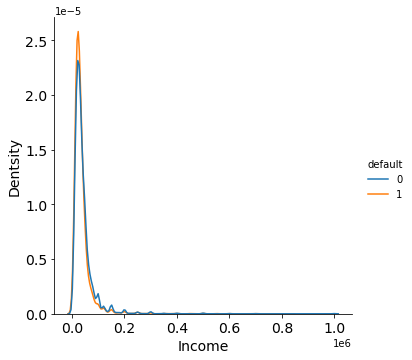

In [63]:
sns.displot(data, x='income', hue='default', kind="kde", common_norm=False)

plt.xlabel('Income', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

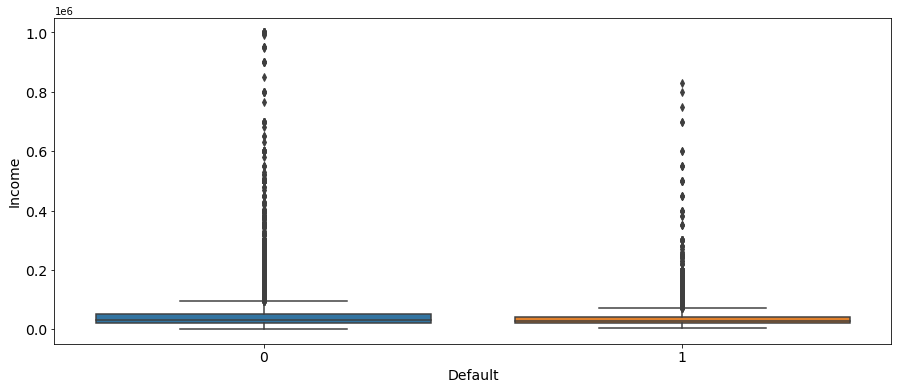

In [64]:
plt.figure(figsize=(15, 6))

sns.boxplot(x='default', y='income', data=data)

plt.ylabel('Income', fontsize=14)
plt.xlabel('Default', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

In [65]:
data.groupby('default')['income'].mean()

default
0    41799.713288
1    36288.113316
Name: income, dtype: float64

In [66]:
data.groupby('default')['income'].median()

default
0    30000
1    28000
Name: income, dtype: int64

In [68]:
df_income = data.copy()
df_income.income = np.log(data.income+1)

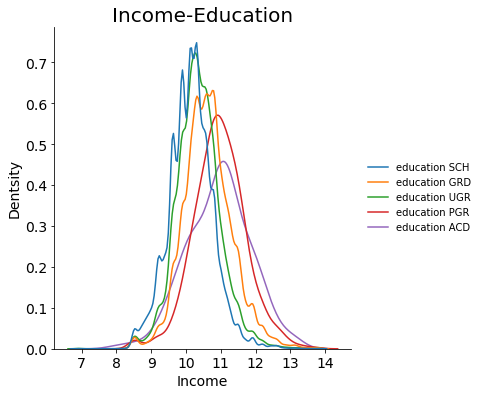

In [69]:
sns.displot(
    {
        "education SCH": df_income[df_income.education == 'SCH'].income,
        "education GRD": df_income[df_income.education == 'GRD'].income,
        "education UGR": df_income[df_income.education == 'UGR'].income,
        "education PGR": df_income[df_income.education == 'PGR'].income,
        "education ACD": df_income[df_income.education == 'ACD'].income,
    },
    kind="kde",
    common_norm=False
)

plt.title('Income-Education', fontsize=20)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

# Feature engineering

In [70]:
data.columns

Index(['client_id', 'app_date', 'education', 'sex', 'age', 'car', 'car_type',
       'decline_app_cnt', 'good_work', 'score_bki', 'bki_request_cnt',
       'region_rating', 'home_address', 'work_address', 'income', 'sna',
       'first_time', 'foreign_passport', 'default'],
      dtype='object')

In [71]:
num_cols = ['age', 'decline_app_cnt', 'score_bki',
            'bki_request_cnt', 'income', 'first_time','region_rating']

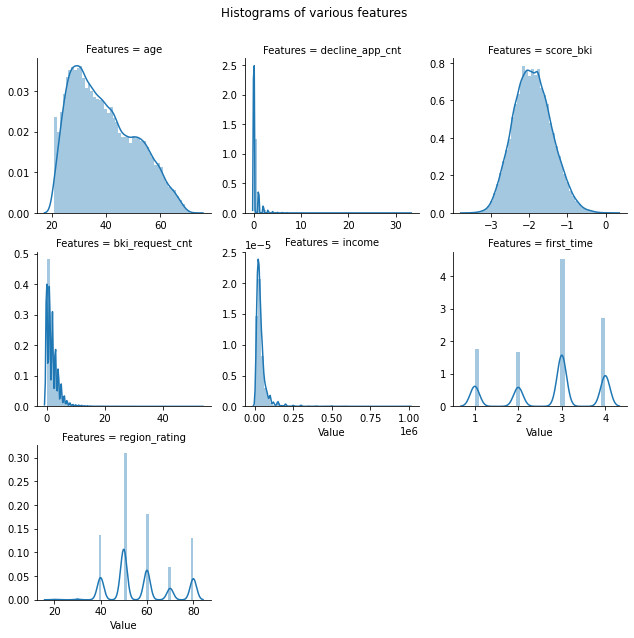

In [72]:
numeric_features = data[num_cols]

numeric_features = numeric_features.stack().reset_index().rename(
    columns={"level_1": "Features", 0: "Value"})

ax = sns.FacetGrid(data=numeric_features, col="Features",
                  col_wrap=3, sharex=False, sharey=False)
ax = ax.map(sns.distplot, "Value")

plt.subplots_adjust(top=0.9)
plt.suptitle("Histograms of various features");

Логорифмирую чтобы нормолизовать

In [76]:
for i in ['age', 'decline_app_cnt', 'bki_request_cnt', 'income']:
    data[i] = np.log(data[i]+1)

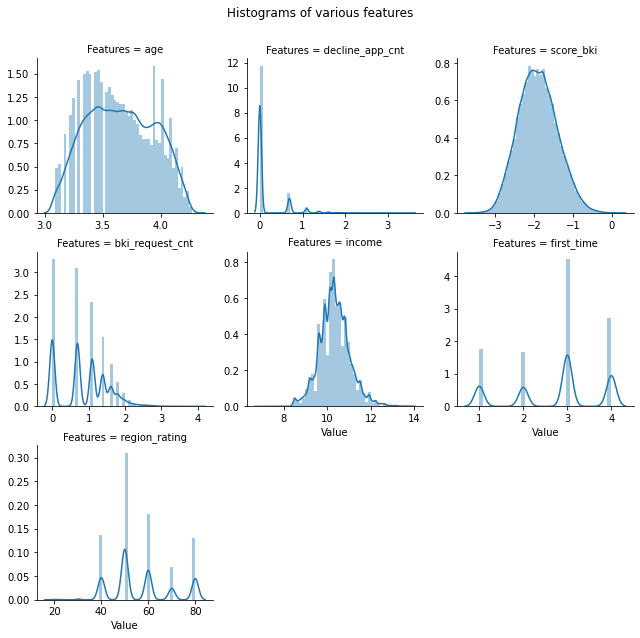

In [77]:
numeric_features = data[num_cols]

numeric_features = numeric_features.stack().reset_index().rename(
    columns={"level_1": "Features", 0: "Value"})

ax = sns.FacetGrid(data=numeric_features, col="Features",
                  col_wrap=3, sharex=False, sharey=False)
ax = ax.map(sns.distplot, "Value")

plt.subplots_adjust(top=0.9)
plt.suptitle("Histograms of various features");

In [79]:
# Новый признак - месяц
data['app_date'] = pd.to_datetime(data['app_date'], format='%d%b%Y')
data['month'] = data['app_date'].dt.month.astype(object)

data.drop(['app_date'],  axis=1, inplace=True)

In [81]:
# Средний доход с учетом рейтинга региона

mean_inc_reg = data.groupby('region_rating')['income'].median().to_dict()
data['mean_income_region'] = data['region_rating'].map(mean_inc_reg)

In [83]:
# Средний доход с учетом возраста

mean_inc_age = data.groupby('age')['income'].median().to_dict()
data['mean_income_age'] = data['age'].map(mean_inc_age)

In [84]:
# Средний score bki с учетом возраста

mean_bki_age = data.groupby('age')['score_bki'].median().to_dict()
data['mean_bki_age'] = data['age'].map(mean_bki_age)

In [85]:
data[:5]

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,...,work_address,income,sna,first_time,foreign_passport,default,month,mean_income_region,mean_income_age,mean_bki_age
0,25905,SCH,M,4.143135,Y,Y,0.000000,0,-2.008753,0.693147,...,2,9.798183,4,1,N,0,2,10.126671,9.903538,-1.981476
1,63161,SCH,F,4.094345,N,N,0.000000,0,-1.532276,1.386294,...,3,9.852247,4,1,N,0,3,10.126671,9.998843,-1.994864
2,25887,SCH,M,3.258097,Y,N,1.098612,0,-1.408142,0.693147,...,2,10.308986,1,4,Y,0,2,10.757924,10.308986,-1.814637
3,16222,SCH,F,3.988984,N,N,0.000000,0,-2.057471,1.098612,...,3,9.210440,1,3,N,0,1,10.126671,10.212803,-1.993905
4,101655,GRD,M,3.891820,N,N,0.000000,1,-1.244723,0.693147,...,3,10.308986,1,4,Y,0,4,10.308986,10.308986,-1.988764


In [86]:
cat_cols = ['education', 'sex', 'car', 'car_type', 'good_work', 'home_address', 'work_address',
       'foreign_passport', 'sna', 'month']

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   client_id           73799 non-null  int64  
 1   education           73799 non-null  object 
 2   sex                 73799 non-null  object 
 3   age                 73799 non-null  float64
 4   car                 73799 non-null  object 
 5   car_type            73799 non-null  object 
 6   decline_app_cnt     73799 non-null  float64
 7   good_work           73799 non-null  int64  
 8   score_bki           73799 non-null  float64
 9   bki_request_cnt     73799 non-null  float64
 10  region_rating       73799 non-null  int64  
 11  home_address        73799 non-null  object 
 12  work_address        73799 non-null  object 
 13  income              73799 non-null  float64
 14  sna                 73799 non-null  int64  
 15  first_time          73799 non-null  int64  
 16  fore

In [90]:
num_cols = list(data.dtypes[data.dtypes == float].index) + list(data.dtypes[data.dtypes == int].index)[1:-1]

In [91]:
num_cols

['age',
 'decline_app_cnt',
 'score_bki',
 'bki_request_cnt',
 'income',
 'mean_income_region',
 'mean_income_age',
 'mean_bki_age']

# Machine Learning


In [93]:
df_label = pd.get_dummies(data, columns=cat_cols,
                          drop_first=True).drop('client_id', axis=1)

In [94]:
df_label[:5]

,age,decline_app_cnt,score_bki,bki_request_cnt,region_rating,income,first_time,default,mean_income_region,mean_income_age,...,home_address_3,work_address_2,work_address_3,foreign_passport_Y,sna_2,sna_3,sna_4,month_2,month_3,month_4
0,4.143135,0.000000,-2.008753,0.693147,50,9.798183,1,0,10.126671,9.903538,...,0,1,0,0,0,0,1,1,0,0
1,4.094345,0.000000,-1.532276,1.386294,50,9.852247,1,0,10.126671,9.998843,...,0,0,1,0,0,0,1,0,1,0
2,3.258097,1.098612,-1.408142,0.693147,80,10.308986,4,0,10.757924,10.308986,...,0,1,0,1,0,0,0,1,0,0
3,3.988984,0.000000,-2.057471,1.098612,50,9.210440,3,0,10.126671,10.212803,...,0,0,1,0,0,0,0,0,0,0
4,3.891820,0.000000,-1.244723,0.693147,60,10.308986,4,0,10.308986,10.308986,...,0,0,1,1,0,0,0,0,0,1


In [95]:
X = df_label.drop('default', axis=1)
y = df_label['default']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, shuffle=True, random_state=RAND)

## Не забываем поставить 'stratify' при огромном разбросе данных

# Baseline

In [96]:
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_score = lr.predict_proba(X_test)[:,1]

In [97]:
print('roc-auc:', roc_auc_score(y_test, y_score))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('logloss:', log_loss(y_test, y_pred))

roc-auc: 0.7292801095617998
precision: 0.23123123123123124
recall: 0.6572769953051644
f1: 0.34210818616016886
logloss: 11.088198727690978


In [98]:
metrics = pd.DataFrame(
    index=['roc-auc', 'precision', 'recall', 'f1', 'logloss'])

metrics['Baseline_LR'] = [roc_auc_score(y_test, y_score),
                          precision_score(y_test, y_pred),
                          recall_score(y_test, y_pred),
                          f1_score(y_test, y_pred),
                          log_loss(y_test, y_pred)]

In [99]:
metrics

,Baseline_LR
roc-auc,0.729280
precision,0.231231
recall,0.657277
f1,0.342108
logloss,11.088199


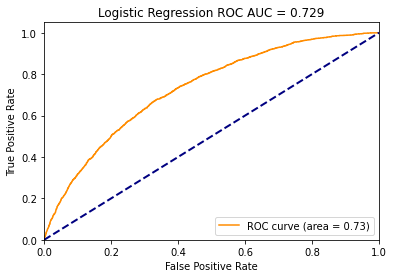

In [100]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.legend(loc="lower right")
plt.show()

# Подбор параметров

In [101]:
parameters_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': np.linspace(1, 1000, num=5),
    'solver': ['sag', 'saga', 'lbfgs'],
    'l1_ratio': [0.25, 0.5, 0.75],
    'max_iter': np.arange(100, 500, 100)
}

lr = LogisticRegression(class_weight='balanced')
cv = StratifiedKFold(n_splits=3, shuffle=True)
grid_cv = GridSearchCV(lr, parameters_grid,
                       scoring='roc_auc', cv=cv, verbose=2)

In [103]:
%%time
# производим обучение по сетке
grid_cv.fit(X_train, y_train)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=saga; total time=   1.7s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=saga; total time=   1.6s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=saga; total time=   1.6s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, penalty=l2, solver=sag; total time=   1.2s
[CV] END C=1.0, l1_ratio=0.25, max_iter=100, pe

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'C': array([   1.  ,  250.75,  500.5 ,  750.25, 1000.  ]),
                         'l1_ratio': [0.25, 0.5, 0.75],
                         'max_iter': array([100, 200, 300, 400]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['sag', 'saga', 'lbfgs']},
             scoring='roc_auc', verbose=2)

In [104]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

0.7360474708400245
{'C': 1.0, 'l1_ratio': 0.25, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [105]:
best_params = {'C': 1.0, 
               'l1_ratio': 0.25,
               'max_iter': 100, 
               'penalty': 'l2', 
               'solver': 'lbfgs'}

In [106]:
lr_gr = LogisticRegression(**best_params, class_weight='balanced')
lr_gr.fit(X_train, y_train)

y_pred_gr = lr_gr.predict(X_test)
y_score_gr = lr_gr.predict_proba(X_test)[:,1]

In [107]:
print('roc-auc:', roc_auc_score(y_test, y_score_gr))
print('precision:', precision_score(y_test, y_pred_gr))
print('recall:', recall_score(y_test, y_pred_gr))
print('f1:', f1_score(y_test, y_pred_gr))
print('logloss:', log_loss(y_test, y_pred_gr))

roc-auc: 0.7292801095617998
precision: 0.23123123123123124
recall: 0.6572769953051644
f1: 0.34210818616016886
logloss: 11.088198727690978


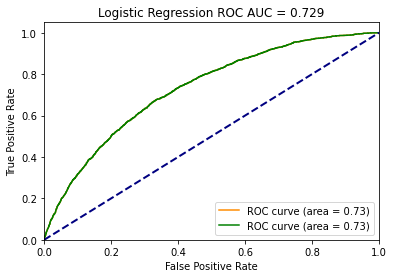

In [108]:
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, y_score_gr)

roc_auc_2 = auc(fpr_2, tpr_2)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot(fpr_2, tpr_2, color='green', label='ROC curve (area = %0.2f)' % roc_auc_2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.legend(loc="lower right")
plt.show()

In [109]:
metrics['Grid_LR'] = [roc_auc_score(y_test, y_score_gr),
                      precision_score(y_test, y_pred_gr),
                      recall_score(y_test, y_pred_gr),
                      f1_score(y_test, y_pred_gr),
                      log_loss(y_test, y_pred_gr)]

In [110]:
metrics[:-1].style.highlight_max(axis=1, color='lightblue')

,Baseline_LR,Grid_LR
roc-auc,0.729280,0.729280
precision,0.231231,0.231231
recall,0.657277,0.657277
f1,0.342108,0.342108


# Анализ важных признаков (shap)

In [112]:
import shap

In [113]:
explainer = shap.LinearExplainer(lr_gr, X_train, feature_dependence="independent")
shap_values = explainer(X_test)

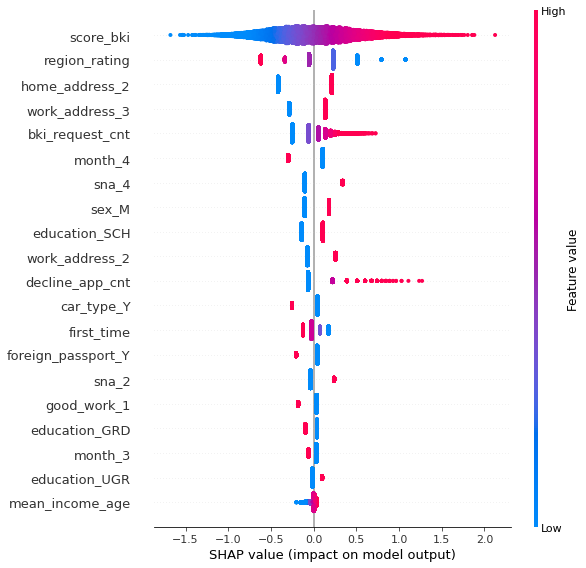

In [114]:
# summary plot
shap.summary_plot(shap_values, X_test)

In [115]:
lr_gr.coef_

array([[-0.06416776,  0.41485732,  1.00097157,  0.27892045, -0.0281942 ,
        -0.02033019, -0.09945623,  0.0455638 ,  0.22077724, -0.03987332,
        -0.13631879, -0.16431438,  0.24840867,  0.11471033,  0.28587122,
         0.0175301 , -0.30165359, -0.21681287,  0.63073346,  0.04064498,
         0.32866921,  0.42143474, -0.24807219,  0.27512754,  0.15934855,
         0.44056507, -0.04711787, -0.08553408, -0.40227972]])

In [116]:
feature_imp = pd.DataFrame()
feature_imp['feature'] = X.columns
feature_imp['imp'] = lr_gr.coef_[0]
feature_imp = feature_imp.sort_values(by='imp', ascending=False)


In [117]:
feature_imp

,feature,imp
2,score_bki,1.000972
18,home_address_2,0.630733
25,sna_4,0.440565
21,work_address_3,0.421435
1,decline_app_cnt,0.414857
20,work_address_2,0.328669
14,sex_M,0.285871
3,bki_request_cnt,0.278920
23,sna_2,0.275128
12,education_SCH,0.248409


In [118]:
df_label.groupby('default')[['score_bki']].median()

,score_bki
default,
0,-1.956982
1,-1.683857


In [123]:
vals = np.abs(shap_values.values).mean(0)
feature_names = X_train

feature_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                  columns=['col_name', 'feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],
                               ascending=False, inplace=True)

In [124]:
cols_show = list(set(feature_importance.col_name[:15]) & set(num_cols))

In [125]:
cols_show

['score_bki', 'decline_app_cnt', 'bki_request_cnt']

In [126]:
df_label[cols_show + ['default']].groupby('default')[cols_show].mean().T

default,0,1
score_bki,-1.938048,-1.675637
decline_app_cnt,0.135281,0.270484
bki_request_cnt,0.858317,1.013421
